In [1]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

The console stream is logged into C:\Users\humza\sg_logs\console.log


[2023-11-27 15:25:03] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-11-27 15:25:05] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-11-27 15:25:06] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-11-27 15:25:14] INFO - utils.py - NumExpr defaulting to 8 threads.
c:\Users\humza\Anaconda3\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
[2023-11-27 15:25:17] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-11-27 15:25:17] WARNING - export.py - Failed to import pytorch_quantization
[2023-11-27 15:25:17] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-11-27 15:25:17] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels.

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="JGZKpDVuuzgoyNN4jcPg")
project = rf.workspace("atathamuscoinsdataset").project("u.s.-coins-dataset-a.tatham")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to U.S.-Coins-Dataset---A.Tatham-5 in yolov5pytorch::   0%|          | 0/3306 [00:00<?, ?it/s]

Extracting Dataset Version Zip to U.S.-Coins-Dataset---A.Tatham-5 in yolov5pytorch::  93%|█████████▎| 3067/3306 [00:02<00:00, 1624.08it/s]

In [5]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

In [8]:
dataset_params = {
    'data_dir':'U.S.-Coins-Dataset---A.Tatham-5',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['Dime', 'Nickel', 'Penny', 'Quarter']
}

In [9]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

In [10]:
train_data.dataset.transforms

[DetectionMosaic('additional_samples_count': 3, 'non_empty_targets': False, 'prob': 1.0, 'input_dim': (640, 640), 'enable_mosaic': True, 'border_value': 114),
 DetectionRandomAffine('additional_samples_count': 0, 'non_empty_targets': False, 'degrees': 10.0, 'translate': 0.1, 'scale': [0.1, 2], 'shear': 2.0, 'target_size': (640, 640), 'enable': True, 'filter_box_candidates': True, 'wh_thr': 2, 'ar_thr': 20, 'area_thr': 0.1, 'border_value': 114),
 DetectionMixup('additional_samples_count': 1, 'non_empty_targets': True, 'input_dim': (640, 640), 'mixup_scale': [0.5, 1.5], 'prob': 1.0, 'enable_mixup': True, 'flip_prob': 0.5, 'border_value': 114),
 DetectionHSV('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 1.0, 'hgain': 5, 'sgain': 30, 'vgain': 30, 'bgr_channels': (0, 1, 2), '_additional_channels_warned': False),
 DetectionHorizontalFlip('additional_samples_count': 0, 'non_empty_targets': False, 'prob': 0.5),
 DetectionPaddedRescale('additional_samples_count': 0, 'non_em

{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_yolo_format_train": "function", "coco_detection_yolo_format_val": "function", "dataloaders": "module", "dataset": "Dataset", "dataset_params": "dict", "project": "Project", "rf": "Roboflow", "test_data": "DataLoader", "train_data": "DataLoader", "trainer": "Trainer", "val_data": "DataLoader"}
{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_yolo_format_train": "function", "coco_detection_yolo_format_val": "function", "dataloaders": "module", "dataset": "Dataset", "dataset_params": "dict", "project": "Project", "rf": "Roboflow", "test_data": "DataLoader", "train_data": "DataLoader", "trainer": "Trainer", "val_data": "DataLoader"}
{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_yolo_format_train": "function", "coco_detection_yolo_format_val": "function", "datalo

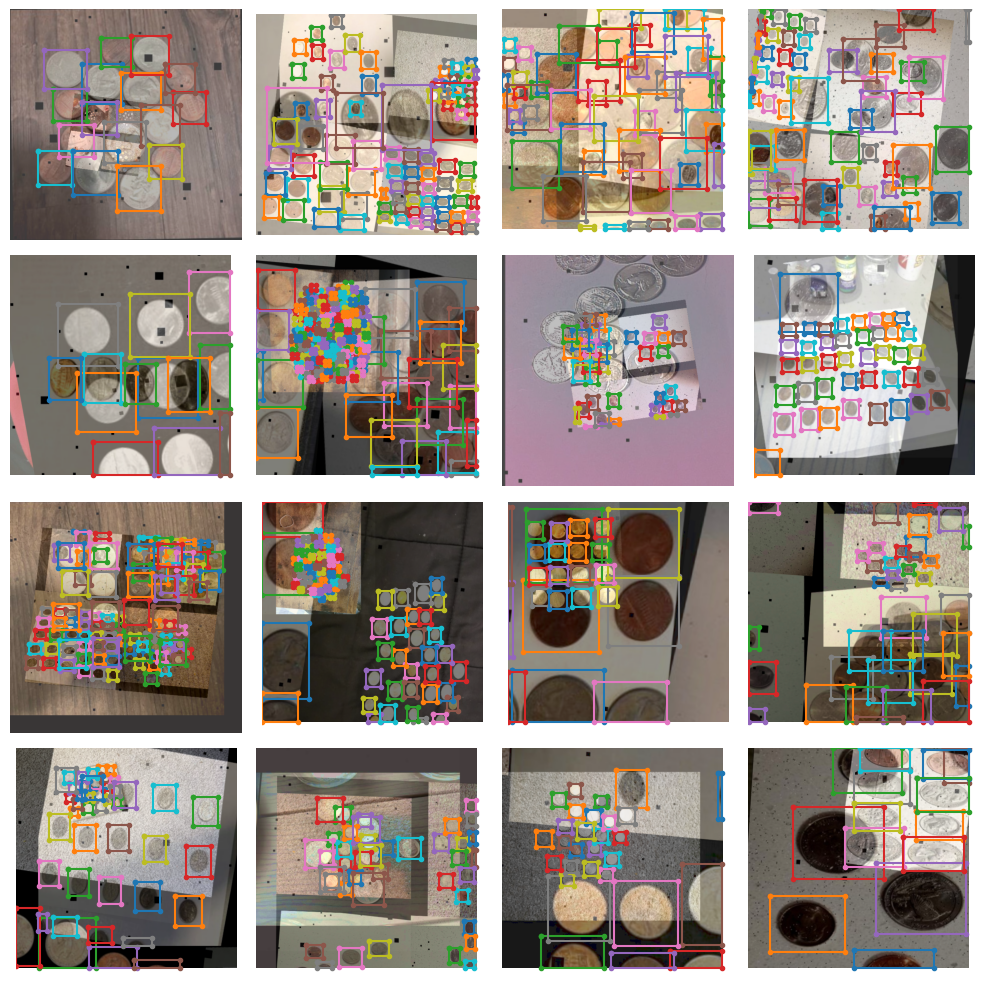

In [11]:
train_data.dataset.plot()

In [12]:
from super_gradients.training import models
model = models.get('yolo_nas_l',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-11-27 16:06:56] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to C:\Users\humza/.cache\torch\hub\checkpoints\yolo_nas_l_coco.pth
100%|██████████| 256M/256M [00:29<00:00, 9.13MB/s] 
[2023-11-27 16:07:28] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_l


In [13]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 10,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [14]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_yolo_format_train": "function", "coco_detection_yolo_format_val": "function", "dataloaders": "module", "dataset": "Dataset", "dataset_params": "dict", "model": "YoloNAS_L", "models": "module", "project": "Project", "rf": "Roboflow", "test_data": "DataLoader", "train_data": "DataLoader", "trainer": "Trainer", "val_data": "DataLoader"}
{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_yolo_format_train": "function", "coco_detection_yolo_format_val": "function", "dataloaders": "module", "dataset": "Dataset", "dataset_params": "dict", "model": "YoloNAS_L", "models": "module", "project": "Project", "rf": "Roboflow", "test_data": "DataLoader", "train_data": "DataLoader", "trainer": "Trainer", "val_data": "DataLoader"}
{"CHECKPOINT_DIR": "str", "Roboflow": "type", "Trainer": "type", "clear_output": "function", "coco_detection_y

The console stream is now moved to checkpoints\my_first_yolonas_run/console_Nov27_16_07_28.txt


[2023-11-27 16:07:40] WARNING - base.py - Ignoring invalid distribution -oundfile (c:\users\humza\anaconda3\lib\site-packages)
[2023-11-27 16:07:40] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}
torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.


AssertionError: mixed precision is not available for CPU

In [ ]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="checkpoints/my_first_yolonas_run/average_model.pth")

In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

In [ ]:
img_url = 'https://www.mynumi.net/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/s/e/serietta_usa_2_1/www.mynumi.net-USASE5AD160-31.jpg'
best_model.predict(img_url).show()